## Plot Graphs

finetune
Epoch 100: 64.05±2.13
Epoch 200: 64.86±1.89
Epoch 300: 64.52±1.99
Epoch 400: 65.24±2.40
Epoch 500: 65.03±2.80
Epoch 600: 64.77±2.30
Epoch 700: 64.72±2.15
Epoch 800: 64.59±3.21
Epoch 900: 64.50±2.76
Epoch 1000: 62.54±4.82
Best F1-score: 65.24±2.40 at epoch 400
DANN
Epoch 100: 60.12±4.62
Epoch 200: 58.96±2.12
Epoch 300: 58.46±3.25
Epoch 400: 60.40±1.96
Epoch 500: 60.19±4.16
Epoch 600: 60.08±2.54
Epoch 700: 59.87±3.55
Epoch 800: 60.85±3.07
Epoch 900: 62.86±3.75
Epoch 1000: 62.61±3.38
Best F1-score: 62.86±3.75 at epoch 900
FMDA
Epoch 100: 65.98±1.57
Epoch 200: 70.74±2.02
Epoch 300: 70.67±3.13
Epoch 400: 69.99±3.14
Epoch 500: 67.19±1.59
Epoch 600: 66.69±1.41
Epoch 700: 67.06±2.53
Epoch 800: 65.95±1.57
Epoch 900: 67.31±2.72
Epoch 1000: 65.75±1.37
Best F1-score: 70.74±2.02 at epoch 200
3-FMDA
Epoch 100: 68.80±2.69
Epoch 200: 70.79±2.58
Epoch 300: 70.16±1.70
Epoch 400: 70.08±1.53
Epoch 500: 67.94±1.28
Epoch 600: 68.27±1.55
Epoch 700: 67.10±2.18
Epoch 800: 65.01±1.44
Epoch 900: 66.82±2

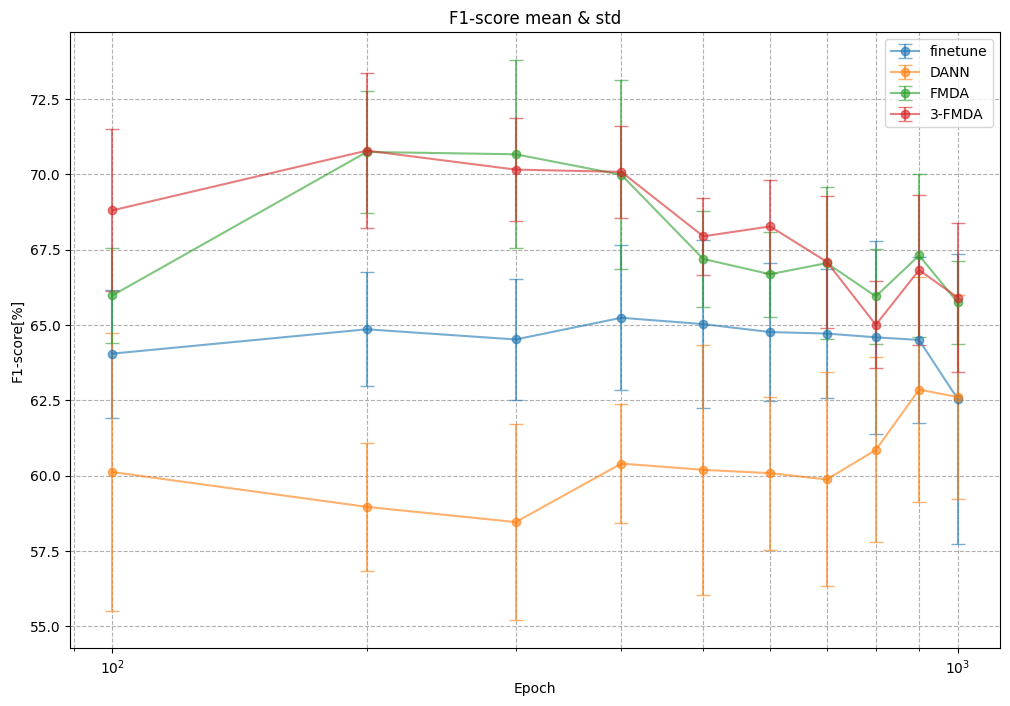

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from common import param

epochs = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])

# Data for different tuning methods
fine_tune = np.loadtxt("result/old2/tomato/3leak/finetune_scores.csv", delimiter=",", dtype="float64")
dann_tune = np.loadtxt("result/old2/tomato/3leak/dann_tune_scores.csv", delimiter=",", dtype="float64")
dist_tune = np.loadtxt("result/old2/tomato/3leak/dist_tune_scores.csv", delimiter=",", dtype="float64")
triplet_tune = np.loadtxt("result/old2/tomato/3leak/triplet_tune_scores.csv", delimiter=",", dtype="float64")


# Calculate mean and standard deviation for each tuning method
np.set_printoptions(precision=2, floatmode='fixed')

mean_fine_tune = np.mean(fine_tune, axis=0)
std_fine_tune = np.std(fine_tune, axis=0)
print("finetune")
for i in range(len(epochs)):
    print(f'Epoch {epochs[i]}: {mean_fine_tune[i]:.2f}±{std_fine_tune[i]:.2f}')
print(f"Best F1-score: {np.max(mean_fine_tune):.2f}±{std_fine_tune[np.argmax(mean_fine_tune)]:.2f} at epoch {epochs[np.argmax(mean_fine_tune)]}")

mean_dann_tune = np.mean(dann_tune, axis=0)
std_dann_tune = np.std(dann_tune, axis=0)
print("DANN")
for i in range(len(epochs)):
    print(f'Epoch {epochs[i]}: {mean_dann_tune[i]:.2f}±{std_dann_tune[i]:.2f}')
print(f"Best F1-score: {np.max(mean_dann_tune):.2f}±{std_dann_tune[np.argmax(mean_dann_tune)]:.2f} at epoch {epochs[np.argmax(mean_dann_tune)]}")

mean_dist_tune = np.mean(dist_tune, axis=0)
std_dist_tune = np.std(dist_tune, axis=0)
print("FMDA")
for i in range(len(epochs)):
    print(f'Epoch {epochs[i]}: {mean_dist_tune[i]:.2f}±{std_dist_tune[i]:.2f}')
print(f"Best F1-score: {np.max(mean_dist_tune):.2f}±{std_dist_tune[np.argmax(mean_dist_tune)]:.2f} at epoch {epochs[np.argmax(mean_dist_tune)]}")

mean_triplet_tune = np.mean(triplet_tune, axis=0)
std_triplet_tune = np.std(triplet_tune, axis=0)
print("3-FMDA")
for i in range(len(epochs)):
    print(f'Epoch {epochs[i]}: {mean_triplet_tune[i]:.2f}±{std_triplet_tune[i]:.2f}')
print(f"Best F1-score: {np.max(mean_triplet_tune):.2f}±{std_triplet_tune[np.argmax(mean_triplet_tune)]:.2f} at epoch {epochs[np.argmax(mean_triplet_tune)]}")

# Plotting the results
plt.figure(figsize=(12, 8))

# Fine-tune
plt.errorbar(epochs, mean_fine_tune, yerr=std_fine_tune, fmt='-o', alpha=0.6, capsize=5, label='finetune')

# DANN
plt.errorbar(epochs, mean_dann_tune, yerr=std_dann_tune, fmt='-o', alpha=0.6, capsize=5, label='DANN')

# FMDA
plt.errorbar(epochs, mean_dist_tune, yerr=std_dist_tune, fmt='-o', alpha=0.6, capsize=5, label='FMDA')

# 3-FMDA
plt.errorbar(epochs, mean_triplet_tune, yerr=std_triplet_tune, fmt='-o', alpha=0.6, capsize=5, label='3-FMDA')

plt.xscale("log")

plt.title('F1-score mean & std')
plt.xlabel('Epoch')
plt.ylabel('F1-score[%]')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Count Dataset

In [1]:
import os

DOMAINS = {
    "03",
    "04",
    "07",
    "08",
    "09",
    "10",
    "11",
    "15",
    "16",
    "19",
    "20",
    "21",
    "22",
    "23",
    "24",
    "26",
    "28",
    "34",
    "37",
    "39",
    "42",
    "43",
    "45",
    "46",
    "51",
    "52",
    "53",
    "61",
    "62",
    "81",
    "82",
    "82",
    "84",
}
dataset_path = "/data2/eto/Dataset/cucumber_fewclass/11class"

# 各クラスの画像数をカウント
# 画像のファイル名の先頭2文字をドメインラベルとして各クラスごとにセットに格納
count_all = 0
domains_all = set()

for phase in ["train", "fewshot", "test"]:
    phase_path = os.path.join(dataset_path, phase)
    dirs = os.listdir(phase_path)
    dirs.sort()
    for dir in dirs:
        if os.path.isdir(os.path.join(phase_path, dir)):
            count = 0
            domains = set()
            for file in os.listdir(os.path.join(phase_path, dir)):
                domains.add(file[:2])
                count += 1

            domains = domains & DOMAINS
            print(f"{phase}/{dir}: {count} images, {domains}")
            count_all += count
            domains_all.update(domains)

print(f"Total: {count_all} images, {domains_all}")


train/00_HEAL: 16016 images, {'03', '07', '23', '10', '20', '39', '11', '51', '45', '09', '04', '08'}
train/01_PowM: 7757 images, {'23', '07', '39', '11', '45', '20'}
train/02_GryM: 636 images, {'23', '11'}
train/03_Anth: 3031 images, {'53', '15', '07'}
train/08_DowM: 6946 images, {'07', '39', '11', '45', '20'}
train/09_CoLS: 7557 images, {'23', '07', '39', '11', '45', '20'}
train/17_GuSB: 1476 images, {'23', '39', '07'}
train/20_BacS: 4355 images, {'20', '07', '51'}
train/22_CCYV: 5961 images, {'10', '11'}
train/23_MosD: 26854 images, {'20', '10', '11'}
train/24_MYSV: 17229 images, {'23', '10', '39', '11', '51', '45', '20'}
fewshot/00_HEAL: 10 images, {'20'}
fewshot/01_PowM: 10 images, {'20', '39'}
fewshot/02_GryM: 10 images, {'23'}
fewshot/03_Anth: 10 images, {'15', '07'}
fewshot/08_DowM: 10 images, {'45', '20', '39'}
fewshot/09_CoLS: 10 images, {'20', '39', '11'}
fewshot/17_GuSB: 10 images, {'39'}
fewshot/20_BacS: 10 images, {'20'}
fewshot/22_CCYV: 10 images, set()
fewshot/23_MosD: 

In [25]:
import os
DOMAINS = {
    "03",
    "04",
    "07",
    "08",
    "09",
    "10",
    "11",
    "15",
    "16",
    "19",
    "20",
    "21",
    "22",
    "23",
    "24",
    "26",
    "28",
    "34",
    "37",
    "39",
    "42",
    "43",
    "45",
    "46",
    "51",
    "52",
    "53",
    "61",
    "62",
    "81",
    "82",
    "82",
    "84",
}
dataset_paths = [
    "/data2/eto/Dataset/cucumber_fewclass/11class",
    "/data2/eto/Dataset/tomato",
    "/data2/eto/Dataset/eggplant_fewclass/7class_leak",
]


# 各クラスの画像数をカウント
# 画像のファイル名の先頭2文字をドメインラベルとして各クラスごとにセットに格納
count_all = 0
classes_all = set()
domains_all = set()

for dataset_path in dataset_paths:
    for phase in ["train", "test", "fewshot"]:
        phase_path = os.path.join(dataset_path, phase)
        dirs = os.listdir(phase_path)
        dirs.sort()
        count_phase = 0
        domains_phase = set()
        print(f"== {dataset_path}/{phase} ==")
        for dir in dirs:
            if os.path.isdir(os.path.join(phase_path, dir)):
                count = 0
                domains = set()
                classes_all.add(dir)
                for file in os.listdir(os.path.join(phase_path, dir)):
                    domains.add(file[:2])
                    count += 1

                domains = domains & DOMAINS

                print(f"{dir}: {count} images, {len(domains)}:{domains}")
                count_all += count
                domains_all.update(domains)
                count_phase += count
                domains_phase.update(domains)
        print(f"Total-{phase}: {count_phase} images, {len(domains_phase)}:{domains_phase}")

print(f"Total-across: {count_all} images, {len(domains_all)}:{domains_all}")
print(sorted(classes_all))


== /data2/eto/Dataset/cucumber_fewclass/11class/train ==
00_HEAL: 16016 images, 12:{'10', '45', '23', '03', '09', '39', '04', '51', '11', '08', '07', '20'}
01_PowM: 7757 images, 6:{'45', '23', '39', '11', '07', '20'}
02_GryM: 636 images, 2:{'23', '11'}
03_Anth: 3031 images, 3:{'07', '15', '53'}
08_DowM: 6946 images, 5:{'45', '39', '11', '07', '20'}
09_CoLS: 7557 images, 6:{'45', '23', '39', '11', '07', '20'}
17_GuSB: 1476 images, 3:{'07', '23', '39'}
20_BacS: 4355 images, 3:{'07', '20', '51'}
22_CCYV: 5961 images, 2:{'10', '11'}
23_MosD: 26854 images, 3:{'10', '20', '11'}
24_MYSV: 17229 images, 7:{'45', '10', '23', '39', '51', '11', '20'}
Total-train: 97818 images, 14:{'10', '23', '09', '04', '53', '20', '45', '15', '03', '39', '51', '11', '08', '07'}
== /data2/eto/Dataset/cucumber_fewclass/11class/test ==
00_HEAL: 5573 images, 9:{'45', '23', '09', '39', '51', '11', '08', '07', '20'}
01_PowM: 1895 images, 6:{'45', '23', '39', '11', '07', '20'}
02_GryM: 164 images, 2:{'23', '11'}
03_Ant